In [1]:
%matplotlib inline

In [12]:
import numpy as np
import nengo

n = 10
m = 10
b = np.random.randn(m, 1)

with nengo.Network() as model:
    x = nengo.Ensemble(n, 1, neuron_type=nengo.LIFRate())
    conn = nengo.Connection(x, nengo.Node(size_in=1),
                            eval_points=b,
                            function=b,
                            solver=nengo.solvers.Lstsq(rcond=0))

with nengo.Simulator(model) as sim:
    print(sim.data[conn].solver_info['rmses'])
    print(np.linalg.norm(sim.data[conn].weights))

Building finished in 0:00:01.                                                                                                                                  
[ 0.00083016]
0.176093583644


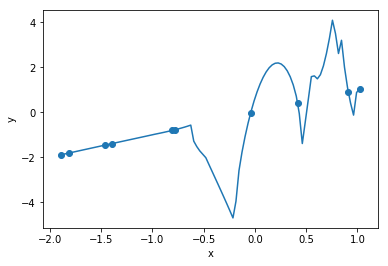

In [13]:
import matplotlib.pyplot as plt

u_sample = sim.data[conn].eval_points
u = np.linspace(np.min(u_sample), np.max(u_sample), 100)

plt.figure()
plt.plot(u, nengo.builder.ensemble.get_activities(sim.data[x], x, u[:, None]).dot(sim.data[conn].weights.T))
plt.scatter(u_sample, conn.function)
plt.xlabel("x")
plt.ylabel("y")
plt.show()